In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use("ggplot")
import nltk 

In [2]:
# Reading Dataset 
df=pd.read_csv('E:\Sentiment Analysis\Reviews.csv')

df=df.head(500)


In [3]:
# Checking the shape of the dataset 

print(df.shape)



(500, 10)


### Quick Exploratory Data Analysis 

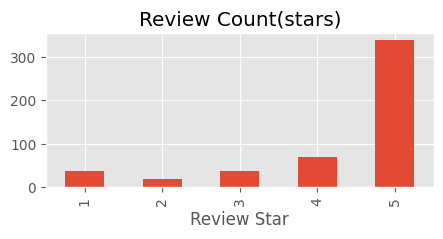

In [4]:
ax = df['Score'].value_counts(0).sort_index().plot(kind="bar", title="Review Count(stars)", figsize=(5, 2))
ax.set_xlabel("Review Star")
plt.show()

### NLTK 


In [5]:
example =df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to D:nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:

token = nltk.word_tokenize(example)
print(token    )

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft', ',', 'I', 'do', "n't", 'like', 'it', '.', 'Quaker', 'Oats', 'is', 'the', 'way', 'to', 'go', '.']


In [8]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     D:nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [9]:
#part of speech 

tag = nltk.pos_tag(token)
print(tag)

[('This', 'DT'), ('oatmeal', 'NN'), ('is', 'VBZ'), ('not', 'RB'), ('good', 'JJ'), ('.', '.'), ('Its', 'PRP$'), ('mushy', 'NN'), (',', ','), ('soft', 'JJ'), (',', ','), ('I', 'PRP'), ('do', 'VBP'), ("n't", 'RB'), ('like', 'VB'), ('it', 'PRP'), ('.', '.'), ('Quaker', 'NNP'), ('Oats', 'NNPS'), ('is', 'VBZ'), ('the', 'DT'), ('way', 'NN'), ('to', 'TO'), ('go', 'VB'), ('.', '.')]


In [10]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to D:nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [11]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to D:nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to D:nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     D:nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     D:nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to D:nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to D:nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-date!
[nltk_data]    | Downloading package biocr

True

In [12]:
# Entities

entities= nltk.chunk.ne_chunk(tag)

print(entities)

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


### VADAR (Valance Aware Dictionary and sEntiment Reasoner)

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia=SentimentIntensityAnalyzer()

In [14]:
#Testing
sia.polarity_scores("I am so happy!")


{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [15]:
#Polarity Score on example

sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [16]:
# Polarity Score on the whole dataset

res={}

for i, row in tqdm(df.iterrows(), total=len(df)):
    text=row['Text']
    myid=row['Id']
    res[myid]=sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [17]:
vaders=pd.DataFrame(res).T
vaders= vaders.reset_index().rename(columns={'index': 'Id'})
vaders=vaders.merge(df, how='left')

In [18]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Ploting VADER Results

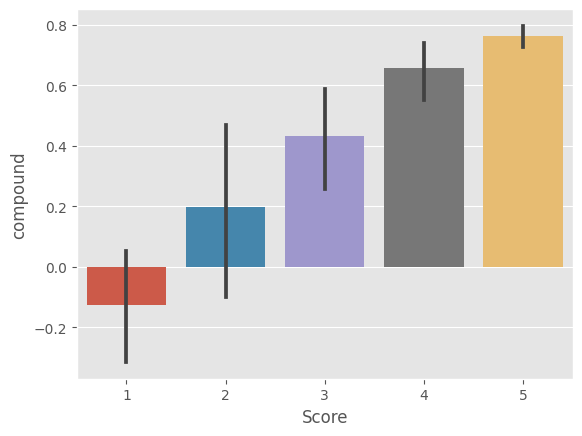

In [19]:
sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

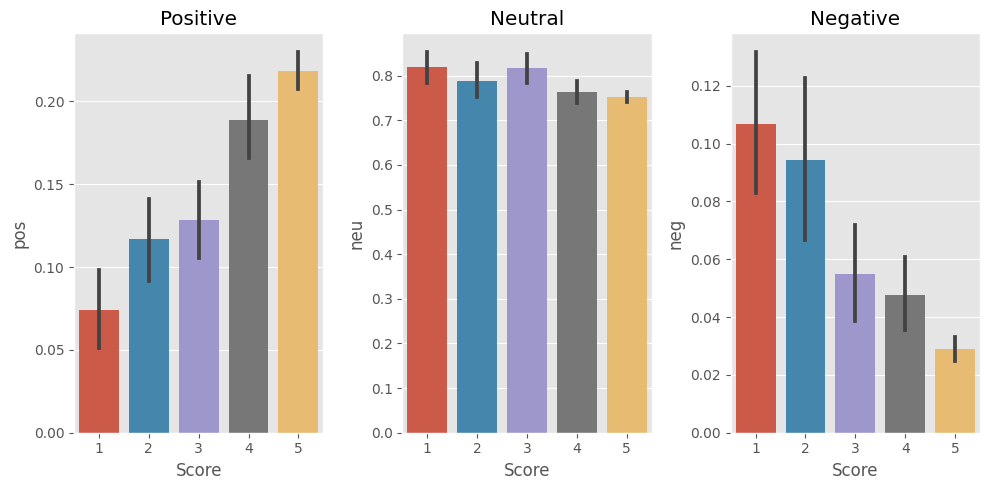

In [20]:

fig, axs=plt.subplots(1,3, figsize=(10,5))
sns.barplot(data=vaders, x="Score", y='pos', ax=axs[0])
sns.barplot(data=vaders, x="Score", y='neu', ax=axs[1])
sns.barplot(data=vaders, x="Score", y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

### Roberta Pretrained Model

In [21]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [22]:
MODEL = f'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer=AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)

In [23]:
# Running Roberta Model
tokenizer(example, return_tensors='pt')


{'input_ids': tensor([[    0,   713,  1021, 38615,    16,    45,   205,     4,  3139, 39589,
           219,     6,  3793,     6,    38,   218,    75,   101,    24,     4,
          3232,  4218,   384,  2923,    16,     5,   169,     7,   213,     4,
             2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1]])}

In [24]:
encoded_text=tokenizer(example, return_tensors='pt')
output=model(**encoded_text)
scores=output[0][0].detach().numpy()#numpy scoring
scores=softmax(scores)
scores_dict={
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
    
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.02068747, 'roberta_pos': 0.0029573706}


In [25]:
# Running the model on entire dataset

def polarity_scores_roberta(examples):
    encoded_text=tokenizer(example, return_tensors='pt')
    output=model(**encoded_text)
    scores=output[0][0].detach().numpy()#numpy scoring
    scores=softmax(scores)
    scores_dict={
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    
    }
    return scores_dict

In [26]:
res={}

for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text=row['Text']
        myid=row['Id']
    
        vader_results=sia.polarity_scores(text)
    
        #renaming keys 
        vader_results_rename={}
        for key, value in vader_results.items():
             vader_results_rename[f'vader_{key}'] = value
    
        roberta_results=polarity_scores_roberta(text)
      
        both={**vader_results_rename, **roberta_results}
    
        res[myid] = both
    except RuntimeError:
        print(f'Broken text for ID {myid}')


  0%|          | 0/500 [00:00<?, ?it/s]

In [27]:
both

{'vader_neg': 0.0,
 'vader_neu': 0.678,
 'vader_pos': 0.322,
 'vader_compound': 0.9811,
 'roberta_neg': 0.97635514,
 'roberta_neu': 0.02068747,
 'roberta_pos': 0.0029573706}

In [28]:
results_df=pd.DataFrame(res).T
results_df= results_df.reset_index().rename(columns={'index': 'Id'})
results_df=results_df.merge(df, how='left')



results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.976355,0.020687,0.002957,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.976355,0.020687,0.002957,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.976355,0.020687,0.002957,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.976355,0.020687,0.002957,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.976355,0.020687,0.002957,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Comparing Scores 

In [29]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

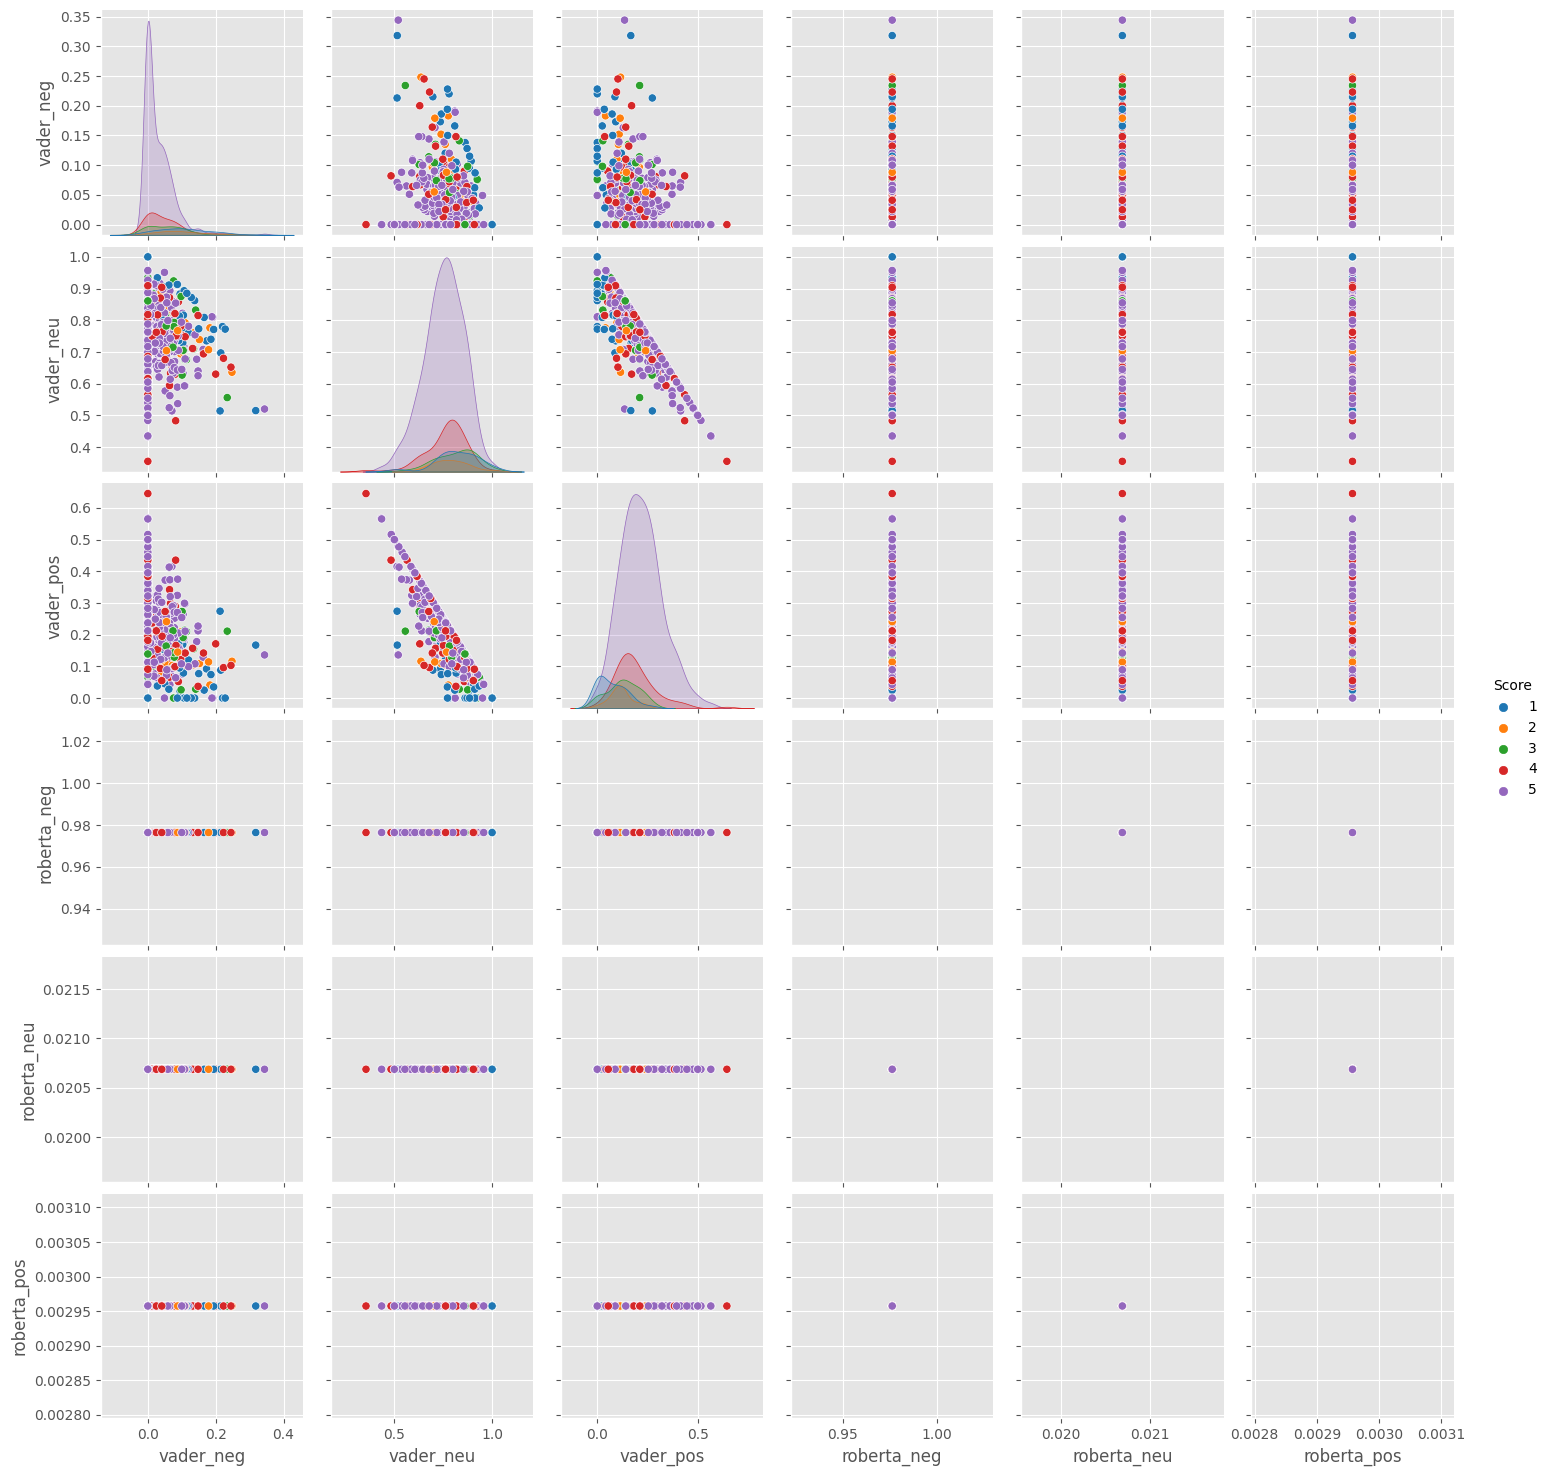

In [30]:
sns.pairplot(data=results_df, 
             vars=["vader_neg", "vader_neu", "vader_pos", 
                  "roberta_neg", "roberta_neu", "roberta_pos"], 
             hue="Score", palette="tab10")
plt.show()

### Review Examples

In [31]:
# Roberta Positive

results_df.query('Score==1') \
.sort_values('roberta_pos', ascending=False)['Text'].values[0]

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

In [32]:
# Vader Positive


results_df.query('Score==1') \
.sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [33]:

# Roberta Negative

results_df.query('Score==5') \
.sort_values('roberta_neg', ascending=False)['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [34]:
# Vader Negative

results_df.query('Score==5') \
.sort_values('vader_neg', ascending= False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

### Pipeline


In [35]:
from transformers import pipeline

sent_pipeline=pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

E:\Anaconda\envs\tfnew\lib\site-packages\huggingface_hub\file_download.py:127: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\User\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [37]:
sent_pipeline('I love sentiment analysis ')

[{'label': 'POSITIVE', 'score': 0.999736487865448}]

In [46]:
sent_pipeline('yuck..')

[{'label': 'NEGATIVE', 'score': 0.9769757390022278}]

## !.........................................................................................................................................................!